# Heart Disease Prediction with Logistic Regression for Binary Classification

## 1. Goals:
- Create and train a Machine Learning model that uses binary classification to predict wether a pacient has a heart disease or not

## 2. Workflow:
- Collect the heart data (Kaggle Heart Disease UCI)
- Pre-process the data
- Split the data into train data and test data (Train-Test split)
- Train a logistic regression model
- Collect new data
- Make predictions

## 3. Dataset:
- Age
- Sex
- Chest pain type (4 values)
- Resting blood pressure
- Serum cholesterol in mg/dl
- Fasting blood sugar > 120mg/dl
- Resting electrocardiographic results (values 0,1,2)
- Maximum heart rate achieved
- Exercise induced angina
- Old peak = ST depression induced by exercise relative to rest
- The slope of the peak exercise ST segment
- Number of major vessels (0-3) colored by flourosopy
- Thai: 3 = normal, 6 = fixed defect, 7 = reversable defect

In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display
import copy

### 2.1 Data collection and Processing

In [486]:
# Loading the data into a pandas dataframe
path = "heart_disease_data.csv"
heart_data = pd.read_csv(path)

In [487]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [488]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [489]:
# Number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [490]:
# Getting some information about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [491]:
# Checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [492]:
# Statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [493]:
# Checking the distribution of target variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

The distribution is approximately even, since the number of True values are close to the number of False values, i.e. the distribution is even:

- 1 reppresents a Defective Heart
- 0 reppresents a Healthy Heart

### 2.2 Splitting the features and the target values

In [494]:
X = heart_data.drop(columns = "target", axis = 1)
y = heart_data["target"]

In [495]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [496]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 2.3 Splitting the data into Training Data and Testing Data

In [497]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)
# stratify distributes the test and train data evenly with true and false data

In [498]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


### 2.4 Model training with Logistic Regression

In [499]:
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

# Create interactive dropdown widgets for feature selection
feature_1_dropdown = widgets.Dropdown(
    options=list(range(X_train_np.shape[1])),
    description='Feature 1:'
)
feature_2_dropdown = widgets.Dropdown(
    options=list(range(X_train_np.shape[1])),
    description='Feature 2:'
)

# Create a function to update the plot
def update_plot(feature_1, feature_2):
    # Extract the selected columns from X_train_np
    x_label = X_train_np[:, feature_1]
    y_label = X_train_np[:, feature_2]

    # Create a mask for coloring the points
    colors = np.where(y_train_np == 1, 'red', 'green')

    # Clear previous plot
    plt.clf()

    # Plot the scatter plot
    plt.scatter(x_label, y_label, c=colors)

    # Add labels and title
    plt.xlabel('Feature {}'.format(feature_1))
    plt.ylabel('Feature {}'.format(feature_2))
    plt.title('Scatter Plot of Features {} and {}'.format(feature_1, feature_2))

    # Show the updated plot
    plt.show()


# Set up the interaction between the dropdowns and the plot update function
widgets.interactive(update_plot, feature_1=feature_1_dropdown, feature_2=feature_2_dropdown)

interactive(children=(Dropdown(description='Feature 1:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), v…

To create a model we need to implement the sigmoid function, the cost function and the gradient descent algorithm function used in logistic regression

In [500]:
# Implement the sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [501]:
# Implement the cost function for logistic regression

def compute_cost(X, y, w_in, b_in):
    m = X.shape[0]
    cost = 0.0
    
    for i in range(m):
        z_i = np.dot(X[i], w_in) + b_in
        f_wb_i = sigmoid(z_i)
        
        # Compute the summation element for the current example
        summation_element = -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
        
        # Add the summation element to the total cost
        cost += summation_element
    
    # Calculate the average cost over all examples
    cost = cost / m
    
    return cost


In [502]:
# Implement the gradient function that will be used in the gradient descent algorithm

def compute_gradient_logistic(X, y, w_in, b_in):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    
    for i in range(m):
        z_i = np.dot(X[i], w_in) + b_in
        f_wb_i = sigmoid(z_i)
        error = f_wb_i - y[i]
        
        # Update gradients for each weight
        for j in range(n):
            dj_dw[j] += error * X[i, j]
        
        # Update gradient for the bias term
        dj_db += error
    
    # Calculate average gradients over all examples
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db


In [503]:
# Implement the gradient descent function that will be used to train the model

def compute_gradient_descent_logistic(X, y, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient_logistic):
    cost_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost_i = compute_cost(X, y, w, b)
        cost_history.append(cost_i)
        
        if i % 1000 == 0:
            print(f"Cost for iteration {i} is {cost_i}")
        
    print(f"Final value of w is {w}.")
    print(f"Final value of b is {b}.")
    
    return w, b, cost_history

    

### Choosing alpha, w_in, b_in and num_iters

In [507]:
iterations = 100001
alpha = 0.000082
rows, columns = X_train_np.shape

In [508]:
rows, columns

(242, 13)

In [509]:
w_0 = np.zeros((columns,))
b_0 = 0

In [510]:
w_final, b_final, cost_final = compute_gradient_descent_logistic(X_train_np,y_train_np,w_0,b_0,alpha,iterations,
                                                                 compute_cost,compute_gradient_logistic)

Cost for iteration 0 is 0.6920597032902921
Cost for iteration 1000 is 0.5856220914526847
Cost for iteration 2000 is 0.5776988713265857
Cost for iteration 3000 is 0.5703593128326749
Cost for iteration 4000 is 0.5633572066892156
Cost for iteration 5000 is 0.5566585681170492
Cost for iteration 6000 is 0.5502476285025631
Cost for iteration 7000 is 0.544110618317283
Cost for iteration 8000 is 0.5382344124948877
Cost for iteration 9000 is 0.532606424745641
Cost for iteration 10000 is 0.5272146013079374
Cost for iteration 11000 is 0.5220474184082979
Cost for iteration 12000 is 0.51709387633052
Cost for iteration 13000 is 0.5123434902165811
Cost for iteration 14000 is 0.5077862782023519
Cost for iteration 15000 is 0.5034127474496208
Cost for iteration 16000 is 0.49921387856589977
Cost for iteration 17000 is 0.49518110883802524
Cost for iteration 18000 is 0.49130631464546975
Cost for iteration 19000 is 0.4875817933644181
Cost for iteration 20000 is 0.4840002450240426
Cost for iteration 21000 is

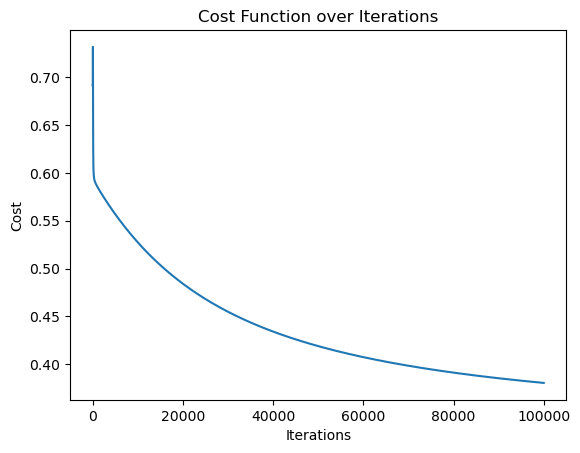

In [511]:
# Plot the cost function over iterations
plt.plot(range(len(cost_final)), cost_final)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

In [512]:
def prediction_model(w,b,example):
    z = np.dot(example,w)+b
    f_wb = sigmoid(z)
    y_binary = (f_wb >= 0.5).astype(int)
    return y_binary

### Testing the accuracy of the prediction model

In [518]:
# Creating a prediction array for every training example of the training data
training_examples = X_train_np.shape[0]
y_pred = []
for i in range(training_examples):
    y_pred.append(prediction_model(w_final,b_final,X_train_np[i]))
y_pred_np = np.array(y_pred)

In [520]:
accuracy = (np.sum(y_train_np == y_pred_np)/len(y_train_np))*100
accuracy

84.29752066115702